### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

# Task 1 Implementation


**Import Libraries and data**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
#Load the data file into a dataframe object : df
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")

In [62]:
#Display the first 5 observation of the dataset
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [64]:
#Remove the extra columns
ColumnsToRemove =["status_id","status_published","Column1","Column2","Column3","Column4"]
df = df.drop(ColumnsToRemove,axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [65]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


**My Observations**

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB




1.   **Columns "num_Comments" and "num_likes" have different values **
2.   **All other columns have most value as 0 **
3.   **Status_type has 4 unique values**

**I am selecting num_comments and num_comments columns for clustering**








# EDA


In [67]:
def DetailsAboutData (df):
    count_null = df.isnull().sum()
    df_stats = pd.DataFrame(index = df.columns, data =
                           {'datatype': df.dtypes,
                            'unique_values': df.nunique(),
                            'have_null?': df.isnull().any(),
                            'Number of null values' : count_null,
                            'percentage of null values' : count_null/df.shape[0]*100 })
    return df_stats

In [68]:
#Perform EDA viz. Is there any missing values in each column of the provided dataset
DetailsAboutData(df)

,datatype,unique_values,have_null?,Number of null values,percentage of null values
status_type,object,4,False,0,0.0
num_reactions,int64,1067,False,0,0.0
num_comments,int64,993,False,0,0.0
num_shares,int64,501,False,0,0.0
num_likes,int64,1044,False,0,0.0
num_loves,int64,229,False,0,0.0
num_wows,int64,65,False,0,0.0
num_hahas,int64,42,False,0,0.0
num_sads,int64,24,False,0,0.0
num_angrys,int64,14,False,0,0.0


In [70]:
#Display all the unique status_type of the dataframe
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [71]:
#Convert categorical variable, i.e., status_type into numerical representation using a label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

In [72]:
df.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [73]:
df.status_type.value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

In [74]:
df.num_reactions.value_counts()

1       131
2       124
0       121
14      121
3       116
       ... 
974       1
958       1
2999      1
2404      1
4094      1
Name: num_reactions, Length: 1067, dtype: int64

In [75]:
df.num_likes.value_counts()

1       128
2       127
0       126
14      124
12      120
       ... 
998       1
994       1
978       1
974       1
4094      1
Name: num_likes, Length: 1044, dtype: int64

In [76]:
df.num_loves.value_counts()

0      4230
1       611
2       282
3       213
4       131
       ... 
529       1
657       1
122       1
126       1
349       1
Name: num_loves, Length: 229, dtype: int64

###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [77]:
#Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[["num_reactions"]])
df['num_reactions']= scaler.transform(df[["num_reactions"]])

scaler.fit(df[["num_comments"]])
df['num_comments'] = scaler.transform(df[["num_comments"]])

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.112314,0.024393,262,432,92,3,1,1,0
1,1,0.031847,0.000000,0,150,0,0,0,0,0
2,3,0.048195,0.011243,57,204,21,1,1,0,0
3,1,0.023567,0.000000,0,111,0,0,0,0,0
4,1,0.045223,0.000000,0,204,9,0,0,0,0


# Elbow Method Implementation

In [78]:
#Use Elbow method to determine the number of cluster to be formed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
#import matplotlib.style as style

In [79]:
np.set_printoptions(threshold=np.inf)

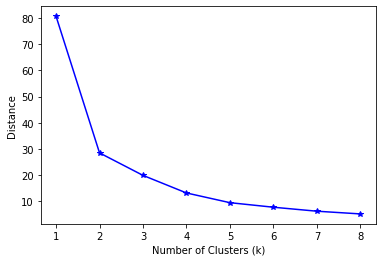

In [80]:
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8]
avg_distance=[]
silhouette_avg = []
for n_clusters in range_n_clusters:
  clusterer = KMeans(init="k-means++",n_clusters=n_clusters,n_init=10,max_iter=300,random_state=42).fit(df[['num_reactions','num_comments']])
  avg_distance.append(clusterer.inertia_)

#style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance ,'b*-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()


**The point at which the elbow shape is created is 2, that is, our K value or an optimal number of clusters is 2. Now let’s train the model on the dataset with a number of clusters 2.**

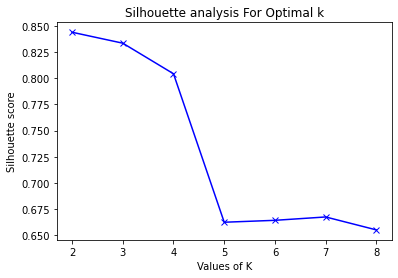

In [81]:
#Verify optimal number of clusers on the basis of silhouette scores

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df[['num_reactions','num_comments']])
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(df[['num_reactions','num_comments']], cluster_labels,metric = 'euclidean'))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**Based on the silhouette score, the clear peak is at k = 2. Hence, the optimal number of clusters is 2.**

In [82]:
#Lets train our model with clusters = 2
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=42)
y_kmeans = kmeans.fit_predict(df[['num_reactions','num_comments']])
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Assigning cluster label to each instance of the dataframe by creating a new column 'ClusterID'**

In [83]:
df['ClusterID'] = y_kmeans

In [84]:
df.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,ClusterID
0,3,0.112314,0.024393,262,432,92,3,1,1,0,0
1,1,0.031847,0.000000,0,150,0,0,0,0,0,0
2,3,0.048195,0.011243,57,204,21,1,1,0,0,0
3,1,0.023567,0.000000,0,111,0,0,0,0,0,0
4,1,0.045223,0.000000,0,204,9,0,0,0,0,0


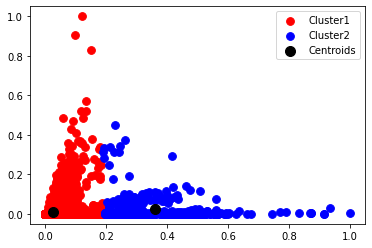

In [85]:
# Visualising the clusters
df1 = df[df.ClusterID == 0]
df2 = df[df.ClusterID == 1]
plt.scatter(df1.num_reactions,df1.num_comments, s = 60, c = 'red', label = 'Cluster1') 
plt.scatter(df2.num_reactions,df2.num_comments, s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend() 


In [86]:
df.ClusterID.value_counts()

0    6550
1     500
Name: ClusterID, dtype: int64

**Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score**

In [87]:
from sklearn import metrics

print("Rand Score : ", metrics.rand_score(df.status_type,df.ClusterID))
print("Adjusted Rand Score: ", metrics.adjusted_rand_score(df.status_type,df.ClusterID))

Rand Score :  0.5070438440541337
Adjusted Rand Score:  0.03923217760366958


###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [88]:
df_fruit = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")

In [89]:
df_fruit.head(5)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [90]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   mass         59 non-null     int64  
 2   width        59 non-null     float64
 3   height       59 non-null     float64
 4   color_score  59 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.4 KB


In [91]:
df_fruit.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


**Scale the value. Each feature should be centered (zero mean) and with unit variance**

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [93]:
#Using Standard scaler 
standardscaler = StandardScaler()
X_fruit = standardscaler.fit_transform(df_fruit)
X_fruit[:5]

array([[-1.2877072 ,  0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [-1.2877072 ,  0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [-1.2877072 ,  0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-0.45282011, -1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-0.45282011, -1.45037224, -1.36432727, -2.29223608,  0.35587203]])

In [94]:
#Finding the first two principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_fruit)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

**First two principal components**

In [95]:
principalDf.head(5)

,principal component 1,principal component 2
0,1.397979,-0.570203
1,0.698442,-0.660323
2,0.386423,-0.303174
3,-2.796851,-0.457201
4,-2.965085,-0.313240


**Analysis - perform PCA with 4 components and print their explained variance_ratio**

In [96]:
pca = PCA(n_components=4)
pca.fit(X_fruit)
pca.components_
pca.transform(X_fruit)
print("Explained Variance Ratio with 4 components - ", pca.explained_variance_ratio_)

Explained Variance Ratio with 4 components -  [0.46714596 0.31485849 0.16064024 0.04624694]
